<a href="https://colab.research.google.com/github/Biswamitra4599/mri_setup/blob/automate_1.0/Bart_sense_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#USING BART


## Importing System Libraries & Mounting Drive


In [2]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Image
import h5py
import glob
import shutil
import subprocess

In [3]:
#Mounting Google Drive
from google.colab import drive
# !rm -rf drive

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
def delete_path(path_to_delete):
  if os.path.exists(path_to_delete) and os.path.isdir(path_to_delete):
    try:
      # Force delete the directory and all its contents
      shutil.rmtree(path_to_delete)
      print(f"Directory '{path_to_delete}' and all its contents have been deleted.")
    except Exception as e:
      print(f"Error while deleting the directory: {e}")
  else:
    print(f"The directory '{path_to_delete}' does not exist.")

def create_path(path_to_create):
  if not os.path.exists(path_to_create):
    os.makedirs(path_to_create)
    print(f"Path Created!!! Put the '.h5' files in the specific place: {path_to_create}")
  else:
    print("Path Already Exists!!")

In [5]:
# Remove an empty directory
mri_path="/content/drive/MyDrive/MRI/"
cfl_path=mri_path+"CFL/"
buffer_path=mri_path+"BUFFER/"
h5_path=mri_path+"H5/"
test_path=mri_path+"TEST/"
# Clearning the Buffer if exixts
delete_path(buffer_path)
bash_path=mri_path+"BASH/"

Directory '/content/drive/MyDrive/MRI/BUFFER/' and all its contents have been deleted.


In [6]:
# Managing the Paths to avoid any Error
if not os.path.exists(mri_path):
  os.makedirs(mri_path)
  os.makedirs(cfl_path)
  os.makedirs(buffer_path)
  os.makedirs(h5_path)
  os.makedirs(test_path)
  print(f"Path Created!!! Put the '.h5' files in the specific place: {h5_path}")
else:
  os.makedirs(buffer_path)
  print("Path Already Exists!!")


Path Already Exists!!


## Fast MRI Setup

In [7]:
!pip install fastmri

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00


In [8]:
import fastmri
from fastmri.data import transforms as T
from fastmri.data.subsample import RandomMaskFunc

## Sense Reconstruction
by: Mahesh (SIR)

### Setting up the GPU and the appt environment

In [9]:
%%bash
# Use CUDA 10.1 when on Tesla K80
# Estimate GPU Type
GPU_NAME=$(nvidia-smi --query-gpu=gpu_name --format=csv,noheader)
echo "GPU Type:"
echo $GPU_NAME

if [ "Tesla K80" = "$GPU_NAME" ];
then
    echo "GPU type Tesla K80 does not support CUDA 11. Set CUDA to version 10.1."
    # Change default CUDA to version 10.1
    cd /usr/local
    rm cuda
    ln -s cuda-10.1 cuda
    echo "done!!!"
else
    echo "Current GPU supports default CUDA-11."
    echo "No further actions are necessary."
fi

echo "GPU Information:"
nvidia-smi --query-gpu=gpu_name,driver_version,memory.total --format=csv
nvcc --version

GPU Type:

Current GPU supports default CUDA-11.
No further actions are necessary.
GPU Information:
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


bash: line 3: nvidia-smi: command not found
bash: line 21: nvidia-smi: command not found


### BART INSTALLATION

1.  Dependencies for BART,
2.  Installation of BART,
3.  Environment Setup.







In [10]:
%%bash

# Install BARTs dependencies
apt-get install -y make gcc libfftw3-dev liblapacke-dev libpng-dev libopenblas-dev &> /dev/null

# Clone Bart
[ -d /content/bart ] && rm -r /content/bart
git clone https://github.com/mrirecon/bart/ bart &> /dev/null
echo "Dependencies Done!!"
pwd

Dependencies Done!!
/content


In [11]:
%%bash
pwd
BRANCH=ISMRM21

cd bart

pwd
# Switch to desired branch of the BART project
git checkout -q $BRANCH

pwd

# Define specifications
COMPILE_SPECS=" PARALLEL=1
                CUDA=1
                CUDA_BASE=/usr/local/cuda
                CUDA_LIB=lib64
                OPENBLAS=1
                BLAS_THREADSAFE=1"

printf "%s\n" $COMPILE_SPECS > Makefiles/Makefile.local

make &> /dev/null


/content
/content/bart
/content/bart


In [12]:
# Define environment variables for BART and OpenMP
os.environ['TOOLBOX_PATH'] = "/content/bart"
os.environ['OMP_NUM_THREADS']="4"
# Add the BARTs toolbox to the PATH variable
os.environ['PATH'] = os.environ['TOOLBOX_PATH'] + ":" + os.environ['PATH']
sys.path.append("/content/bart/python")
print(sys.path)

['/content', '/env/python', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.11/dist-packages/IPython/extensions', '/root/.ipython', '/content/bart/python']


In [13]:

!echo "# The BART used in this notebook:"
!cd bart/
!which bart
!echo "# BART version: "
!bart version
!bart


# The BART used in this notebook:
/content/bart/bart
# BART version: 
v0.7.00-88-g9d66c09
BART. Available commands are:
avg         bench       bin         bitmask     cabs        caldir      
calmat      carg        casorati    cc          ccapply     cdf97       
circshift   conj        conv        conway      copy        cpyphs      
creal       crop        delta       ecalib      ecaltwo     epg         
estdelay    estdims     estshift    estvar      extract     fakeksp     
fft         fftmod      fftrot      fftshift    filter      flatten     
flip        fmac        homodyne    index       invert      itsense     
join        looklocker  lrmatrix    mandelbrot  mip         moba        
mobafit     nlinv       noise       normalize   nrmse       nufft       
ones        pattern     phantom     pics        pocsense    poisson     
pol2mask    poly        repmat      reshape     resize      rmfreq      
rof         roistat     rss         rtnlinv     sake        saxpy       
scal

In [14]:
from bart import bart

## Moving into the Problem

### Remaining Libs

In [15]:
# More python libraries
import cfl

### Setup Visualization Helper
https://github.com/mrirecon/bart/blob/master/python/cfl.py

https://colab.research.google.com/github/mrirecon/bart-workshop/blob/master/mri_together_2021/bart_intro_examples.ipynb#scrollTo=__DLJ4XLDwXx


In [16]:
def plot_map(dataname, colorbar, vmin, vmax, cbar_label):

    # Import data
    data = np.abs(cfl.readcfl(dataname).squeeze())
    # Import colorbar type
    colorbartype =  colorbar
    # Set zero to a black color for a masking effect
    my_cmap = cm.get_cmap(colorbartype, 256)
    my_cmap.set_bad('black')
    data = np.ma.masked_equal(data, 0)
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(111)
    im = ax1.imshow(data, interpolation='nearest', cmap=my_cmap, vmin=vmin, vmax=vmax)

    # Style settings
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label(cbar_label)
    cbar.ax.tick_params()

    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.xaxis.set_ticks_position('none')
    ax1.yaxis.set_ticks_position('none')
    ax1.set_axis_off()

    plt.show()

def bart_plot(data, title=None, vmin=None, vmax=None, cmap='gray', cbar_label='', mag=True, fsize=10):

    # Import data
    data = np.abs(data) if mag else data

    fig = plt.figure(figsize=(fsize,fsize))
    ax1 = fig.add_subplot(111)
    im = ax1.imshow(data, interpolation='nearest', cmap=cmap, vmin=vmin, vmax=vmax)
    if title:
      plt.title(title)
    # Style settings
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label(cbar_label)
    cbar.ax.tick_params()

    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.xaxis.set_ticks_position('none')
    ax1.yaxis.set_ticks_position('none')
    ax1.set_axis_off()


    plt.show()

### Function definations

#### Finalized Functions::

In [17]:
#fastmri_to_bart changes the dimentions appropriately to the cfl files
def fastmri_to_bart(data_kspace, slice_no):
    if slice_no == None:
        slice_kspace = data_kspace
    else:
        slice_kspace = data_kspace[slice_no,:,:,:]
    slice_kspace_format = np.transpose(slice_kspace, axes=[1,2,0])
    slice_kspace_format2=np.expand_dims(slice_kspace_format, axis=2)
    return slice_kspace_format2

# Get a list of all .h5 files in the directory
def get_file_list():
    h5_files = glob.glob(os.path.join(h5_path, "*.h5"))
    ll=[]

    for h5_file in h5_files:
      temp=h5_file.replace(h5_path,"")
      temp=temp.replace(".h5","")
      ll.append(temp)
    return ll

#Getting User Input on Image
def get_user_input(ll):
    for index,tt in enumerate(ll):
      print(index,":\t", tt)
    print("\nEnter the index of the file name from the above list: ")
    ins = input()
    return int(ins)

#Extracting Volume K Space for specified Image.
def get_volume_kspace(h5_file_name):
    hf= h5py.File(h5_file_name)
    volume_kspace = hf['kspace'][()]
    return volume_kspace


def process_h5_file(h5_file_name, slice_no):
    h5_file_path=h5_path+h5_file_name+".h5"
    h5_file_cfl_dict=cfl_path+h5_file_name+"/"
    create_path(h5_file_cfl_dict)

    #Getting the Volume K Space Data
    volume_kspace = get_volume_kspace(h5_file_path)
    print("H5 five file size:",volume_kspace.shape)
    slice_nos=volume_kspace.shape[0]
    print("No of slices are:",slice_nos)
    print("*****\tFor Slice No.: ",slice_no,"\t*********")

    # Extracting Slice from volume K Space
    slice_kspace = volume_kspace[slice_no]
    print("Slice K-Space size: ",slice_kspace.shape)
    full_k_space =fastmri_to_bart(slice_kspace,None)
    print("Slice Full K-Space size(in .cfl format): ",full_k_space.shape)

    # Create the mask function object
    cntr_frac=0.04
    acc_fact=2
    mask_func = RandomMaskFunc(center_fractions=[cntr_frac], accelerations=[acc_fact])

    # Apply the mask to the sliced k-space
    # Converting to Tensors
    slice_kspace_full = T.to_tensor(slice_kspace)
    masked_kspace = T.apply_mask(slice_kspace_full, mask_func)
    masked_kspace_npy = masked_kspace[0].numpy()
    masked_kspace_C_npy = masked_kspace_npy[:,:,:,0] + 1j* masked_kspace_npy[:,:,:,1]
    k_fastmri_ds = fastmri_to_bart(masked_kspace_C_npy, None)

    sampled_path=h5_file_cfl_dict+"_"+str(slice_no)+"_sampled"
    full_path=h5_file_cfl_dict+"_"+str(slice_no)+"_full"

    cfl.writecfl(sampled_path,k_fastmri_ds )
    cfl.writecfl(full_path,full_k_space )
    print("*****\t Successful For Slice No.: ",slice_no,"\t*********")


In [19]:
def recon(file_path, ks_img_path, coil_sensitivity_path, coil_img_path, final_img_path):
  # Run the Bash script using subprocess with multiple arguments
  result = subprocess.run(['bash', file_path, ks_img_path, coil_sensitivity_path, coil_img_path, final_img_path], capture_output=True, text=True)
  # Print the output of the script
  print(result.stdout)
  if result.stderr:
      print("Error:")
      print(result.stderr)

In [20]:
def viz_image(image_path,title=""):
  pics_s = cfl.readcfl(image_path)
  print(np.shape(pics_s))
  vmax=0.5*np.max(np.abs(pics_s))
  plt.imshow(np.abs(pics_s), cmap="gray", vmax=vmax)
  plt.title(title)
  plt.show()
  return pics_s

#### Underdevelopment Functions

In [34]:
#Handel All the Reconstructions
def recon_fs_ss(i):
    ks_image_path=cfl_path+h5_file_name+"/"+str(i)+"_full" #$1
    coil_sensitivity_path=cfl_path+"coils_l_full_"+str(i) #$2
    coil_image_path=cfl_path+"coil_image_full_"+str(i) #$3
    full_image_path=cfl_path+"image_fs_full_"+str(i) #$4

    ###
    ds_ks_image_path=cfl_path+h5_file_name+"/"+str(i)+"_sampled" #$1
    ds_coil_sensitivity_path=cfl_path+"coils_l_sampled_"+str(i) #$2
    ds_coil_image_path=cfl_path+"coil_image_sampled_"+str(i) #$3
    ds_full_image_path=cfl_path+"image_ds_sampled_"+str(i) #$4

    recon(reco, ks_image_path, coil_sensitivity_path, coil_image_path, full_image_path)
    recon(reco, ds_ks_image_path, ds_coil_sensitivity_path, ds_coil_image_path, ds_full_image_path)
    viz_image(full_image_path,title="Full Image")
    # viz_image(coil_image_path,title="Full Image")
    # viz_image(ds_coil_image_path,title="Downsampled Image")
    viz_image(ds_full_image_path,title="Downsampled Image");


In [27]:
def process_h5_file_all_slices(h5_file_name):
    h5_file_path=h5_path+h5_file_name+".h5"
    h5_file_cfl_dict=cfl_path+h5_file_name+"/"
    delete_path(h5_file_cfl_dict)
    create_path(h5_file_cfl_dict)

    #Getting the Volume K Space Data
    volume_kspace = get_volume_kspace(h5_file_path)
    print("H5 five file size:",volume_kspace.shape)
    slice_nos=volume_kspace.shape[0]
    print("No of slices are:",slice_nos)
    for slice_no in range(slice_nos):
        print("*****\tFor Slice No.: ",slice_no,"\t*********")
        # Extracting Slice from volume K Space
        slice_kspace = volume_kspace[slice_no]
        # print("Slice K-Space size: ",slice_kspace.shape)
        full_k_space =fastmri_to_bart(slice_kspace,None)
        # Create the mask function object
        cntr_frac=0.04
        acc_fact=2
        mask_func = RandomMaskFunc(center_fractions=[cntr_frac], accelerations=[acc_fact])

        # Apply the mask to the sliced k-space
        # Converting to Tensors
        slice_kspace_full = T.to_tensor(slice_kspace)
        masked_kspace = T.apply_mask(slice_kspace_full, mask_func)
        masked_kspace_npy = masked_kspace[0].numpy()
        masked_kspace_C_npy = masked_kspace_npy[:,:,:,0] + 1j* masked_kspace_npy[:,:,:,1]
        k_fastmri_ds = fastmri_to_bart(masked_kspace_C_npy, None)

        sampled_path=h5_file_cfl_dict+str(slice_no)+"_sampled"
        full_path=h5_file_cfl_dict+str(slice_no)+"_full"
        cfl.writecfl(sampled_path,k_fastmri_ds )
        cfl.writecfl(full_path,full_k_space )
        recon_fs_ss(slice_no)
        # print("*****\t Successful For Slice No.: ",slice_no,"\t*********")
    print("*****\t Successful For File: ",h5_file_name,"\t*********")

### H5 file Reading

In [22]:
print(bash_path)
reco=bash_path+"reco.sh"

/content/drive/MyDrive/MRI/BASH/


0 :	 file_brain_AXFLAIR_200_6002452
1 :	 file_brain_AXFLAIR_200_6002467
2 :	 file_brain_AXT1POST_201_6002673
3 :	 file_brain_AXT2_210_6001944

Enter the index of the file name from the above list: 
1
Directory '/content/drive/MyDrive/MRI/CFL/file_brain_AXFLAIR_200_6002467/' and all its contents have been deleted.
Path Created!!! Put the '.h5' files in the specific place: /content/drive/MyDrive/MRI/CFL/file_brain_AXFLAIR_200_6002467/
H5 five file size: (16, 20, 640, 320)
No of slices are: 16
*****	For Slice No.:  0 	*********
Done.

Done.

(640, 320)


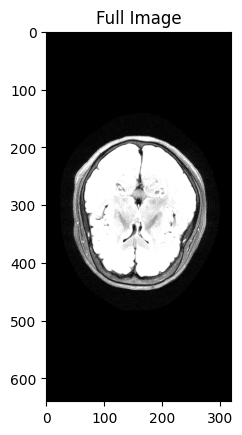

(640, 320)


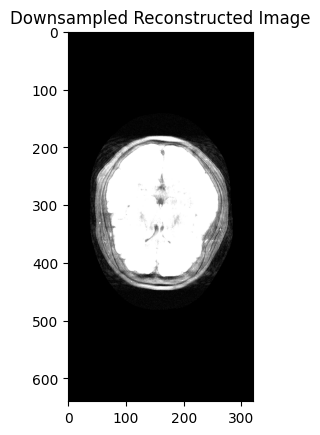

*****	For Slice No.:  1 	*********
Done.

Done.

(640, 320)


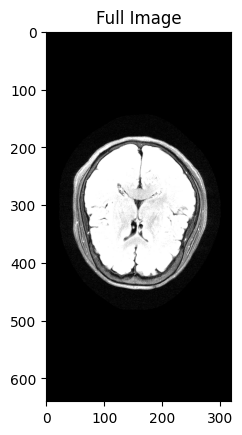

(640, 320)


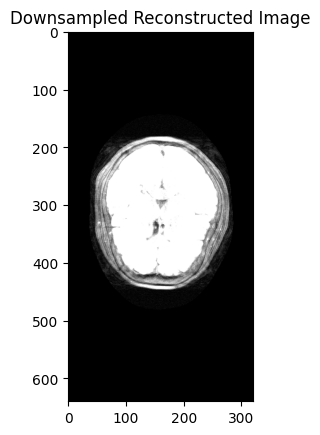

*****	For Slice No.:  2 	*********
Done.

Done.

(640, 320)


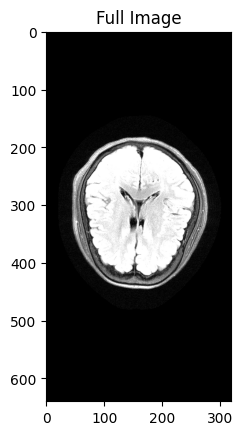

(640, 320)


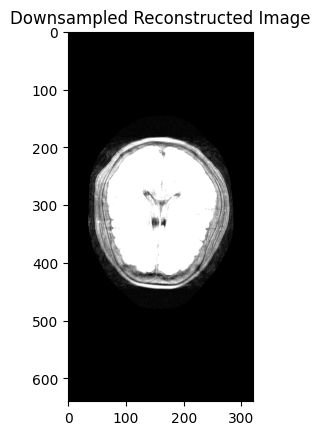

*****	For Slice No.:  3 	*********
Done.

Done.

(640, 320)


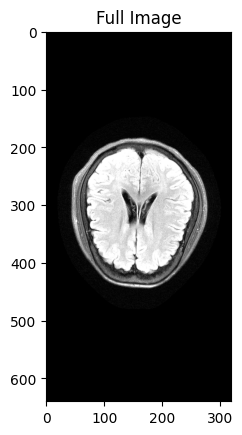

(640, 320)


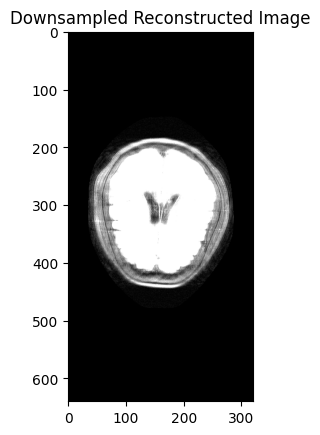

*****	For Slice No.:  4 	*********
Done.

Done.

(640, 320)


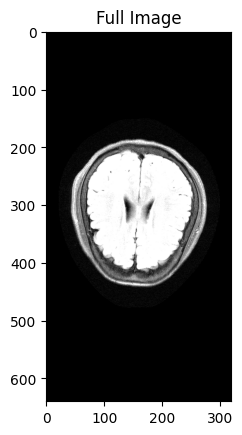

(640, 320)


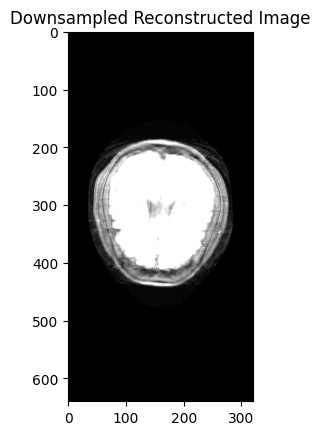

*****	For Slice No.:  5 	*********
Done.



In [ ]:
# H5 File Reading
h5_file_list=get_file_list()
ins=get_user_input(h5_file_list)
h5_file_name=h5_file_list[int(ins)]
process_h5_file_all_slices(h5_file_name)
print(h5_file_name)


### Visualizing the Data

#### Full Spaced Image

In [29]:
# ks_image_path=cfl_path+h5_file_name+"/"+str(i)+"_full" #$1
# coil_sensitivity_path=cfl_path+"coils_l_full_"+str(i) #$2
# coil_image_path=cfl_path+"coil_image_full_"+str(i) #$3
# full_image_path=cfl_path+"image_fs_full_"+str(i) #$4

# ###
# ds_ks_image_path=cfl_path+h5_file_name+"/"+str(i)+"_sampled" #$1
# ds_coil_sensitivity_path=cfl_path+"coils_l_sampled_"+str(i) #$2
# ds_coil_image_path=cfl_path+"coil_image_sampled_"+str(i) #$3
# ds_full_image_path=cfl_path+"image_ds_sampled_"+str(i) #$4

# recon(reco, ks_image_path, coil_sensitivity_path, coil_image_path, full_image_path)
# recon(reco, ds_ks_image_path, ds_coil_sensitivity_path, ds_coil_image_path, ds_full_image_path)

In [30]:
# viz_image(full_image_path,title="Full Image")
# viz_image(ds_full_image_path,title="Downsampled Image");

#### Down Sampled Image

In [ ]:
%%bash
bart ecalib -r24 -m1 /content/drive/MyDrive/MRI/BUFFER/downsampled_fastmri /content/drive/MyDrive/MRI/CFL/coils_l
FFT_FLAG=$(bart bitmask 0 1)
COIL_FLAG=$(bart bitmask 3)
bart fft -i -u $FFT_FLAG /content/drive/MyDrive/MRI/BUFFER/downsampled_fastmri /content/drive/MyDrive/MRI/CFL/coil_image
bart fmac -C -s$COIL_FLAG /content/drive/MyDrive/MRI/CFL/coil_image /content/drive/MyDrive/MRI/CFL/coils_l /content/drive/MyDrive/MRI/CFL/image_ds

In [ ]:
ds_image_path=cfl_path + "image_ds"
pics_ref = cfl.readcfl(ds_image_path)

print(np.shape(pics_ref))
vmax=0.5*np.max(np.abs(pics_ref))
plt.imshow(np.abs(pics_ref), cmap="gray", vmax=vmax)
plt.show()

### Reconstruction Process

In [ ]:
#BART Image Reconstruction
!bart ecalib /content/drive/MyDrive/MRI/BUFFER/downsampled_fastmri /content/drive/MyDrive/MRI/BUFFER/sensitivities
!bart pics -l1 -r0.001 /content/drive/MyDrive/MRI/BUFFER/downsampled_fastmri /content/drive/MyDrive/MRI/BUFFER/sensitivities /content/drive/MyDrive/MRI/CFL/image_out_fmri

In [ ]:
#BART Reconstructed Image Visualization
reconstructed_image_path=cfl_path + "image_out_fmri"
pics_reco = cfl.readcfl(reconstructed_image_path)
vmax=0.5*np.max(np.abs(pics_reco))
pics_reco_sq = np.squeeze(pics_reco)
print(np.shape(pics_reco_sq))

# fig, axes = plt.subplots(figsize=(20,6), nrows=1, ncols=3, sharex=True, sharey=True)

plt.imshow(np.abs(pics_reco_sq[:,:,0]), cmap="gray", vmax=vmax)
plt.show()


In [ ]:
# #BART Image Reconstruction
# !bart ecalib /content/drive/MyDrive/MRI/BUFFER/reference_fastmri /content/drive/MyDrive/MRI/BUFFER/sensitivities
# !bart pics -l1 -r0.001 /content/drive/MyDrive/MRI/BUFFER/downsampled_fastmri /content/drive/MyDrive/MRI/BUFFER/sensitivities /content/drive/MyDrive/MRI/CFL/image_ref_fmri

In [ ]:
# %%bash
# bart ecalib -r24 -m1 /content/drive/MyDrive/MRI/BUFFER/reference_fastmri /content/drive/MyDrive/MRI/CFL/coils_l
# FFT_FLAG=$(bart bitmask 0 1)
# COIL_FLAG=$(bart bitmask 3)
# bart fft -i -u $FFT_FLAG /content/drive/MyDrive/MRI/BUFFER/reference_fastmri /content/drive/MyDrive/MRI/CFL/coil_image
# bart fmac -C -s$COIL_FLAG /content/drive/MyDrive/MRI/CFL/coil_image /content/drive/MyDrive/MRI/CFL/coils_l /content/drive/MyDrive/MRI/CFL/image_ds

In [ ]:
%%bash
bart ecalib -r24 -m1 /content/drive/MyDrive/MRI/BUFFER/downsampled_fastmri /content/drive/MyDrive/MRI/CFL/coils_l
FFT_FLAG=$(bart bitmask 0 1)
COIL_FLAG=$(bart bitmask 3)
bart fft -i -u $FFT_FLAG /content/drive/MyDrive/MRI/BUFFER/downsampled_fastmri /content/drive/MyDrive/MRI/CFL/coil_image
bart fmac -C -s$COIL_FLAG /content/drive/MyDrive/MRI/CFL/coil_image /content/drive/MyDrive/MRI/CFL/coils_l /content/drive/MyDrive/MRI/CFL/image_ds

In [ ]:
#BART Reconstructed Image Visualization
reconstructed_image_path=cfl_path + "image_ds"
pics_reco = cfl.readcfl(reconstructed_image_path)
vmax=0.5*np.max(np.abs(pics_reco))
pics_reco_sq = np.squeeze(pics_reco)
print(np.shape(pics_reco_sq))

# fig, axes = plt.subplots(figsize=(20,6), nrows=1, ncols=3, sharex=True, sharey=True)

plt.imshow(np.abs(pics_reco_sq[:,:,0]), cmap="gray", vmax=vmax) #pics_reco_sq[:,:,0]
plt.show()


In [ ]:
#Difference Map Plotting
diff_map = np.abs(pics_reco_sq[:,:,0])/np.max(np.abs(pics_reco_sq[:,:,0])) - np.abs(pics_ref)/np.max(np.abs(pics_ref))
plt.imshow(np.abs(diff_map), cmap="gray", vmax=1)
plt.show()

In [ ]:
diff_map = np.abs(pics_ds)/np.max(np.abs(pics_ds)) - np.abs(pics_ref)/np.max(np.abs(pics_ref))
plt.imshow(np.abs(diff_map), cmap="gray", vmax=1)
plt.show()

## Removing the BUFFER

In [ ]:
# Check if the directory exists
if os.path.exists(buffer_path) and os.path.isdir(buffer_path):
    try:
        # Force delete the directory and all its contents
        shutil.rmtree(buffer_path)
        print(f"Directory '{buffer_path}' and all its contents have been deleted.")
    except Exception as e:
        print(f"Error while deleting the directory: {e}")
else:
    print(f"The directory '{buffer_path}' does not exist.")



In [ ]:
!vim /content/drive/MyDrive/MRI/BASH/recon.sh
